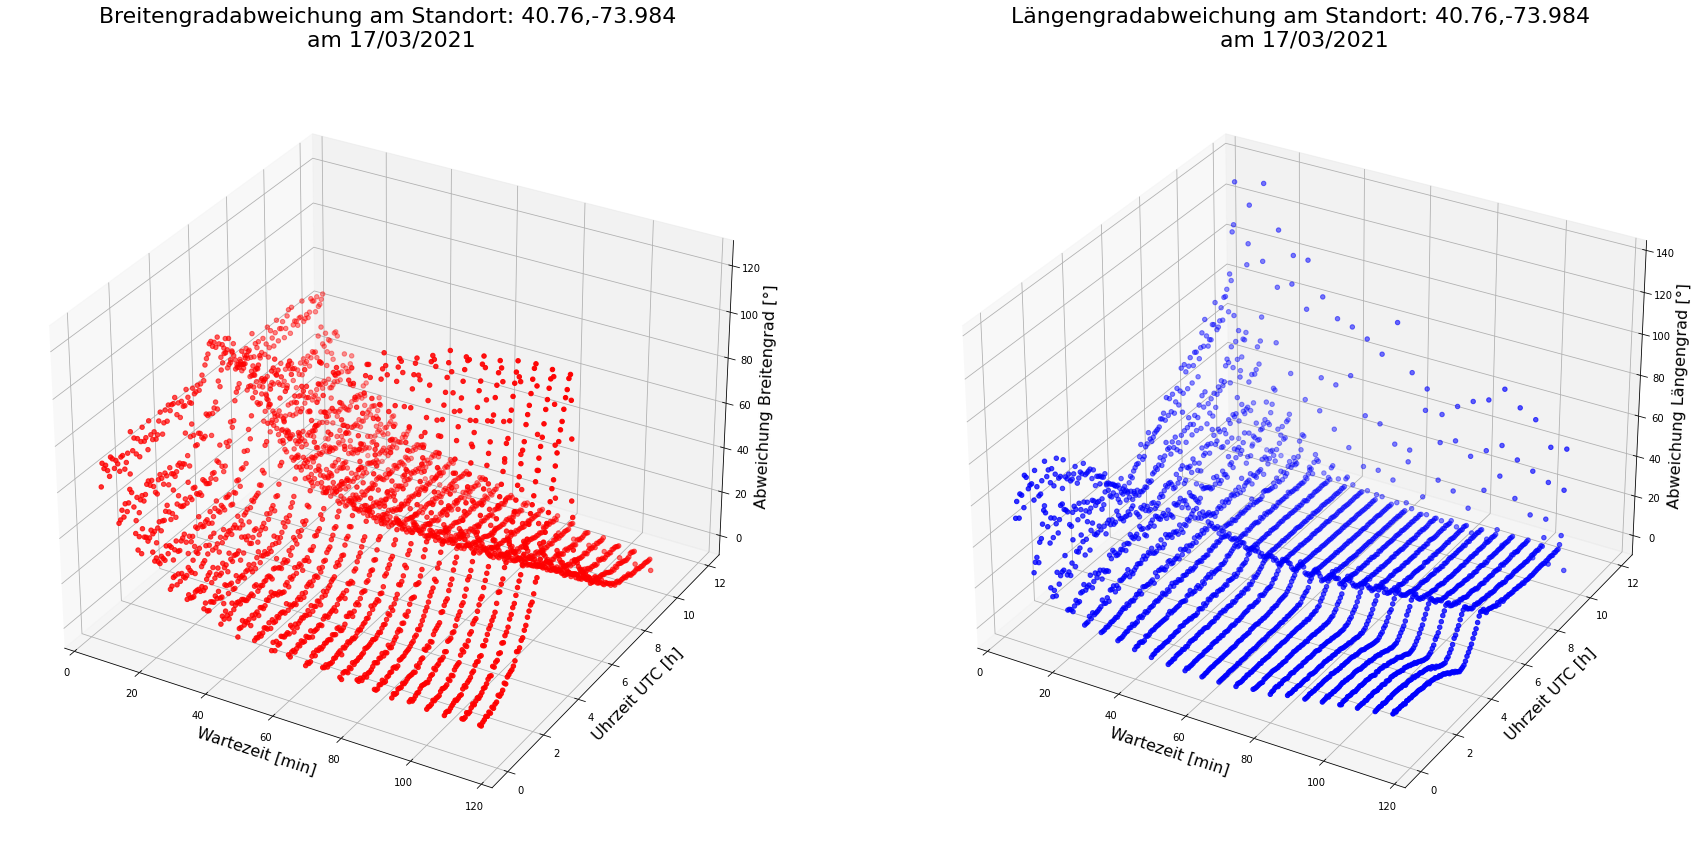

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob('../SimulationPrograms/datafiles/deviations/*.deviationdata')

for file in files: 
    
    with open(file, 'r', encoding='utf-8') as lines:
        lines = lines.readlines()
    
    #Datei auslesen und Daten aufbereiten
    location = lines[0]
    date = lines[1]
    time = lines[2].split(':')
    time = time[0]*60+ time[1]

    wait = np.array([])
    time = np.array([])
    latitude = np.array([])
    longitude = np.array([])

    for i in range(3, len(lines)):
        data = list(map(float, lines[i].split(';')))
        wait = np.append(wait, data[0]/60)
        time = np.append(time, data[1]/3600)
        latitude = np.append(latitude, data[2])
        longitude = np.append(longitude, data[3])
    
    #Werte der Datei veranschaulichen
    fig = plt.figure(figsize=(30,30))

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("Breitengradabweichung am Standort: "+location+" am "+date, fontsize=22)
    ax.scatter(wait, time, latitude, c='r', marker='o')

    ax.set_xlabel('Wartezeit [min]', fontsize=16)
    ax.set_ylabel('Uhrzeit UTC [h]', fontsize=16)
    ax.set_zlabel('Abweichung Breitengrad [°]', fontsize=16)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_title("Längengradabweichung am Standort: "+location+" am "+date, fontsize=22)
    ax.scatter(wait, time, longitude, c='b', marker='o')

    ax.set_xlabel('Wartezeit [min]', fontsize=16)
    ax.set_ylabel('Uhrzeit UTC [h]', fontsize=16)
    ax.set_zlabel('Abweichung Längengrad [°]', fontsize=16)

    plt.show()